# Neural Networks and Deep Learning Theory

- AI is the new Electricity
¿Qué aprenderemos?:

Principios acerca de Deep Learning, como crear redes neuronales. 
Haremos un algoritmo para crear reconocimientos de gatos.

## Week 1

### Introduction to neural networks

- Podemos utilizar una red neuronal para predecir los precios de las casas a partir del tamaño de una casa.
Normalmente, utilizaríamos un modelo de regresión para hacer fit sobre una línea.

- Sin embargo, si usamos una neurona, tendrá como entrada x el tamaño de la casa y como salida la Y, que sería el precio. Sabiendo que estos precios jamás serán negativos.

- Está función que inicia desde cero, es utilizada bastante en redes neuronales:

- **ReLU Functions**: Significa una Rectified Linear Unit- Empieza desde cero y empieza a hacer la predicción.

<img src = 'House_Predictions.png'>

En estos casos, en vez del ejemplo al lado el título, la red neuronal define que tipo de características es esta. Adicional, cada una de las características que conectan al precio, pasa por todas las redes neuronales

### Supervised Learning With Neural Networks

Significa, en este caso, que uno escoge que será el input y el output de la red neuronal. Y obteniendo así los resultados esperados.

Para algunas aplicaciones, es conveniente utilizar una o diferentes tipos de redes neuronales:

- **Standard NN**: Predecir series de tiempo, precios, ads, información de usuarios.

- **Convolutional Neural Networks**: Detección y segmentación de imágenes

- **Recurrent Neural Network**: Audios, Traducción

<img src = 'Neural_Networks_Types.png'>

En los últimos tiempos, se ha pasado en las redes neuronales, de funciones sigmoides a funciones RELU que son capaces de tener mejor performance en el entrenamiento de redes neuronales.

Hace que el descenso del gradiente sea mucho mejor y más rápido utilizando RELU

## Week 2

En esta semana, se aprenderá a configurar un problema de machine learning con redes neuronales y utilizando vectorización para hacer modelos más rápidos

### Clasificación binaria

Aprenderé de dos conceptos importantes: **Forward Propagation** y **Backward Propagation**

<img src = 'Binary_1.png'>

Cuando hacemos clasificación binaria, por ejemplo, de una imagen, si tenemos una imagen de 64x64 pixeles, esta puede ser dividida en 3 matrices RGB, cada matriz tiene las combinaciones para generar el color adecuado.

En este caso, nuestra clasificación binaria **Y** nos dará como resultado: 1 es un gato, 0 no es un gato.

Para ello, tenemos un vector **X** que tomará como entrada, todas combinaciones de RGB, el tamaño de este vector se denota como **n** o **nx**. Al tener 3 matrices, cada una de 64x64, en total tendríamos un vector de tamaño 12.288

La idea de este modelo, es que al pasar el vector **X** con la información RGB de la imagen, nos devuelva un **Y** el cual es un binario y nos dirá 1 si es un gatito, o 0 si no lo es

#### Notación utilizada:

<img src = 'Binary_2.png'>

La notación utilizada en el curso, corresponde a lo siguiente:

- (x, y), donde x pertenece a los reales de tamaño n, e y que está en el conjunto de 0 a 1
- Tenemos **m** training examples, los cuales son {(x1, y1), (x2, y2) ... (xn, yn)}
- Donde **m** es todo el training, y **mtest**, es el número de test examples

Por otro aldo, tenemos las matrices y vectores:
- Dónde X es una matriz de m x n
- Dónde Y, es un vector horizontal (1, m) que pertenece a los reales de dimensión 1 x m


### Logistic Regression

#### Logistic Regression Definition

Este modelo, se utiliza cuando se hace clasificación binaria.

Dado un x, queremos un  $\hat{y} = P(y = 1 | x)$ donde $0 \leq \hat{y} \leq 1$, $\hat{y}$ nos dice la probabilidad de que sea o no un gato.

Dónde $\ x \in R^n$

- Parámetros: $\ w \in R^n, b \in R$. <br>
¿Cómo generamos una función que nos devuelva $\hat{y}$?, algo que podríamos intentar pero non funcionaría sería lo siguiente:

- Salida: $\hat{y} = w^Tx + b$, esta función toma la traspuesta w, el cual sería bueno si estariamos haciendo una regresión lineal, pero, esto incluso nos daría valores negativo, pero, no tendría sentido para lo que quermos

Ahora bien, para tener una salida, podemos aplicar una función sigmoide a la ecuación anterior, esta función empieza desde cero y corta en 0.5, quedando de la siguiente forma:

- Salida: $\hat{y} = \sigma(w^Tx + b)$, denotaremos a lo que se encuentra dentro de la función, como z.

La función sigmoide estaría definida de la siguiente forma: $\sigma(z) = \frac{1}{1+e^{-z}}$.

- Si z es un valor muy grande, da aproximadamente 1.
- Si z es un valor muy pequeño, o negativo, da aproximadamente 0.

#### Logistic Regression Cost Function

Para poder determinar los parámetros de w y b, debemos generar una función de costo, lo cual será lo siguiente dentro de la explicación:

##### Loss Function

En general, lo que hicimos la vez pasada, es lo siquiente:

- $\hat{y} = \sigma(w^{T}x + b)$ dónde $\sigma(z) = \frac{1}{1+e^{-z}}$

- Dado un $\lbrace (x^{(1)}, y^{(1)}),..., (x^{(m)}, y^{(m)}) \rbrace$, queremos, $\hat{y}^{(i)} \approx y^{(i)}$

- Dónde i es el i-th training example

Ahora bien, la función de pérdida, o Loss error function, sería:
- $L(\hat{y},y) = \frac{1}{2}(\hat{y}-y)^2$

Esta función, no es más que el MSE: Mean Squared Error. Pero, en regresión logística, esto no se utiliza, ya que al minimizarlo, no converge a un óptimo. Es decir, en este caso, estaríamos con múltiples óptimos locales y queremos uno global. Entonces, usando descenso del gradiente, no convergerá a un óptimo global.

En ese caso, usaremos una función de pérdida diferente, que pueda converger a un óptimo global:
- $L(\hat{y},y) = -(ylog(\hat{y})+(1-y)log(1-\hat{y}))$

##### Cost Function

Si nos damos cuenta, esto sirve para evaluar 1 a 1 cada ejemplo del training set, para medir nuestro verdadero performance del modelo, debemos definir una función de costo

Función de costo:

- $J(w, b) = \frac{1}{m} \sum_{i=1}^{m}L(\hat{y}^{(i)},y^{(i)})$

Expandiendo la función, sería igual a lo siguiente:
- $J(w, b) = -\frac{1}{m} \sum_{i=1}^{m}[y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$

### Descenso del Gradiente (Teoría)

Recapitulando, tenemos las siguientes funciones:

- $\hat{y} = \sigma(w^{T}x + b)$ dónde $\sigma(z) = \frac{1}{1+e^{-z}}$

<br>

$J(w, b) = \frac{1}{m} \sum_{i=1}^{m}L(\hat{y}^{(i)},y^{(i)}) = -\frac{1}{m} \sum_{i=1}^{m}[y^{(i)}log(\hat{y}^{(i)})+(1-y^{(i)})log(1-\hat{y}^{(i)})]$

Queremos encontrar w, b que minimiza J(w, b)


<img src = 'Descent_1.png'>

#### Tomando a w como eje de ejemplo

Usando como ejemplo el eje de w, lo que haremos con el algoritmo del descenso del gradiente, será lo siguiente.

<img src = 'Descent_2.png'>

Repetidamente: $w:=w-\alpha \frac{dJ(w)}{dw}$, dónde (:=) significa actualizar w, recordemos que la derivada de la función, nos dá la pendiente de la recta tangente al punto w. 

Dónde $\alpha$ es el learning rate. Nuestra derivada de J respecto a w, será representada en el código como dw, siendo esta igual a $\frac{dJ(w)}{dw}$, dejando la ecuación como $w:=w-\alpha dw$

Adicional, recordemos que si evaluamos la en un punto donde la curva crece, la pendiente será positiva, si es en un punto donde decrece, la pendiente será negativa. Queremos que, la pendiente sea completamente paralela al eje de la w, por lo cual, buscaremos que esta derivada, de 0. Así, estaríamos convergiendo al óptimo.

#### Actualizando w y b en nuestro algoritmo de descenso del gradiente

Ahora bien, el ejemplo anterior fue con w solamente, en este caso, si queremos incluir ambos parámetros, hacemos lo siguiente:

- $w:=w-\alpha \frac{dJ(w, b)}{dw}$

<br>

- $b:=b-\alpha \frac{dJ(w, b)}{db}$

Ahora bien, en el código, db también sería la derivada de acuerdo con nuestra notación, quedando la ecuación de la siguiente forma:


- $w:=w-\alpha dw$

<br>

- $b:=b-\alpha db$


### Computation Graph

Dentro de nuestras redes neuronales, tenemos dos pasos:

- **Forward propagation step**: En este, cálculamos la salida o respuesta de nuestra red neuronal.

- **Backward propagation step**: En este, calculamos los gradientes y las derivadas y todas nuestras métricas.

En esta clase, dvar representa la derivada de una respuesta final de una variable, respecto a varias cantidades intermedias

### Descenso del Gradiente aplicado a regresión logística:

#### Descenso del gradiente en un sólo example

- $z = w^Tx + b$
- $\hat{y} = a = \sigma(z)$
- $L(a, y) = -(ylog(a)+(1-y)log(1-a))$

En una gráfica de computación, se vé de la siguiente manera:

<img src = 'Descent_3.png'>

En este caso, queremos, los parámetros de w, y b que nos puedan ayudar a minimizar la función de pérdida.

En computation graph, vamos de adelante para atrás:

<img src = 'Descent_4.png'>

Se calculan todos los dz, db, dw y se pueden actualizar todos los pesos de la siguiente forma:

- $w_1:=w_1-\alpha dw_1$

<br>

- $w_2:=w_2-\alpha dw_2$

<br>

- $b:=b-\alpha db$

#### Descenso del gradiente en m examples

Debemos recordar como está compuesta nuestra fórmula de costo, en este caso, reemplazando $\hat{y}$ por a como definimos anteriormente:

- $J(w, b) = \frac{1}{m} \sum_{i=1}^{m}L(a^{i},y^{(i)})$

Ahora bien, en código, podemos hacer lo siguiente:

In [9]:
import numpy as np

J, dw1, dw2, db = [0, 0, 0, 0]
def sigma(z):
    return None
    
x1 = []
x2 = []
m = []
z = []
a = []
dz = []
y = []
wt = 'matriz traspuesta'
b= 'algo'
for i in m:
    z[i] = wt*x1[i] + b
    a[i] = sigma(z[i])
    J += -(y[i]*np.log(a[i])+(1-y[i])*np.log(1-a[i]))
    dz[i] = a[i]-y[i]
    dw1 += x1[i]*dz[i]
    dw2 += x2[i]*dz[i]
    db += dz[i]
    J /= m
    dw1 /= m
    dw2 /= m
    db /= m


### Vectorization

Esto nos permite incluir código cuyos tiempos de carga sean más rápidos. Esto gracias a las librerías de numpy en Python, hagamos un demo:

In [4]:
import numpy as np

a = np.array([i for i in range(1, 5)])
a

array([1, 2, 3, 4])

In [8]:
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()

print("Vectorized version: "+str(1000*(toc-tic)) + ' ms')
print(c)

c = 0
tic = time.time()
for i in range(1000000):
    c += a[i]*b[i]

toc = time.time()
print(c)
print("For loop: "+str(1000*(toc-tic)) + ' ms')

Vectorized version: 1.0097026824951172 ms
249888.29609155605
249888.29609154782
For loop: 231.04047775268555 ms


In [1]:
import numpy as np

A = np.array([[56.0, 0.0, 4.4, 68.0],
              [1.2, 104.0, 52.0, 8.0],
              [1.8, 135.0, 99.0, 0.9]])

print(A)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]


In [3]:
cal = A.sum(axis=0)
print(cal)

[ 59.  239.  155.4  76.9]


In [4]:
percentage = 100*A/cal.reshape(1,4)
percentage

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

### Coding in Numpy with Python

Primero que todo, recordemos que una función sigmoide se define de la siguiente manera:

- $\sigma(x) = \frac{1}{1+e^{-x}}$

Debemos escribir una función que tome un número cualquiera y nos devuelva su cálculo de la función sigmoide:

In [1]:
import math
def sigmoide(x: float) -> float:
    return 1/(1+math.exp(-x))

sigmoide(4.0)

0.9820137900379085

Ahora bien, en temas de redes neuronales, estaremos trabajando con vectores, si queremos generar una función sigmoide para un vector, debe aprovecharse las bondades de numpy:

In [2]:
import numpy as np
def sigmoide_vectors(x : np.array)->np.array:
    """
    Devuelve los valores de la función sigmoide de un vector:

    Argumentos:
    x(Array): Es un vector de tamaño n

    Return:
    Array: Función sigmoide cálculada para un vector de tamaño n
    """
    return 1/(1+np.exp(-x))

t_x = np.array([1, 2, 3])

sigmoide_vectors(t_x)

array([0.73105858, 0.88079708, 0.95257413])

Ahora bien, podemos graficar con matplotlib el vector de entrada y el vector de arrays

Text(0.5, 1.0, 'Así se vería una función sigmoide')

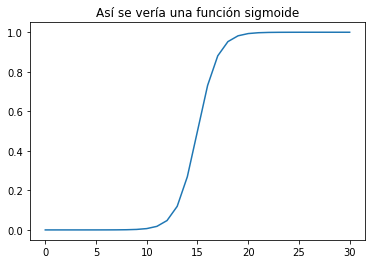

In [9]:
import matplotlib.pyplot as plt

## Definimos un input array como vector de entrada de nuestra función sigmoide:
input_array = np.array([i for i in range(-15, 16)])
output_array = sigmoide_vectors(input_array)
plt.plot(output_array)
plt.title('Así se vería una función sigmoide')


## Week 2: Assignment

En esta parte, se escribirán todas las funciones y paquetes utilizados para el algoritmo de descenso del gradiente. Es importante que, de ser posible, se cuente con una versión gráfica. Esta se puede ver más que todo en Platzi. Recordar el curso de Matemáticas para DS. Traer ese ejercicio a este espacio más adelante y repasarlo.

La idea general, de lo que recuerdo, es la siguiente, debemos, de la función de costo/pérdida, minimizarla hasta que converga a un óptimo global.

En este caso, se está construyendo un modelo de regresión logística que sea capaz de identificar si una imagen es un gato o no es un gato.

### Nuestro DataSet de imágenes:

Es importante resaltar, que nuestro dataset de imágenes tiene colores. Las máquinas, leen las imágenes como una combinación de 3 matrices: RGB, cada matriz es de un tamaño de pixeles específicos y contiene un número entre 0 y 255. 

Entonces, debemos generar un vector, cuyas dimensiones sean: $(m*num_px*num_px*3, 1)$ dónde m es el número de fotos con las que contamos, num_px es el número de pixeles y 3 son las tres matrices RGB.

Para ello, un truco es hacer lo siguiente:

```python

Vector = Vector.reshape(Vector.shape[0], -1).T

```

Adicionalmente, es importante que nuestros vectores, tanto de test como de entrenamiento, estén normalizados. Para ello, se dividen entre 255.

### Ecuaciones

Ahora bien, recordemos que estaremos usando las siguientes ecuaciones:

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

Lo que nos dará, como resultado la siguiente ecuación de costo:

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

En la siguiente parte, vamos a crear una a una cada función que nos ayudará en la creación de nuestro algoritmo:

#### Ecuación sigmoide:

In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

#### Inicializando con ceros las variables de w y b:

In [3]:
def initialize_with_zeros(dim):
    """Recordemos:
    dim: no es más que el tamaño de nuestro w, en anteriores apuntes, definimos que w es de tamaño
    nx
    """
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

#### Propagación hacia delante y hacia atrás:

En esta parte, hacemos todo el cálculo desde inicio a fin, sin calcular las métricas de nuestro modelo. Recordemos las ecuaciones en este caso.

Hacia delante, recordemos que es todo el cálculo normal:

- Tenemos X
- Calculamos $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Luego, la función de costo: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Hacia atrás, calculamos las derivadas parciales de cada función que ya tenemos definidas:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [4]:
def propagate(w, b, X, Y):
    #--Propagación hacia delante:
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X)+b)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis = 1)
    #Se calcula el costo sin usar producto punto, por que la suma en automático
    #toma cada valor de los vectores y los opera entre si, axis = 1 por que todos son
    #vectores de una dimensión

    #--Propagación hacia atrás:
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y, axis=1)[0]
    ##Procedemos a liberar el numpy para que salga como un escalar:
    cost = np.squeeze(np.array(cost))

    ##Guardamos los gradientes en un diccionario
    grads = {
        'dw':dw,
        'db':db
    }
    return grads, cost

Esta función, recibirá como parámetros el w, b, X e Y y hará la propagación hacia delante y hacia atrás.

#### Función de optimización

Esta función, optimizará el modelo y hará las actualizaciones de cada delta en las iteraciones. Recordemos las ecuaciones de este caso:

- $w:=w-\alpha \frac{dJ(w, b)}{dw}$

<br>

- $b:=b-\alpha \frac{dJ(w, b)}{db}$

In [1]:
import copy
def optimize(w, b, X, Y, num_iter = 100, lr = 0.009, print_cost = False):
    ## Hacemos copia de los parámetros iniciales:
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    for i in range(num_iter):
        grads, cost = propagate(w, b, X, Y)

        dw = grads['dw']
        db = grads['db']
        
        w += -lr*dw
        b += -lr*db

        if i%100 == 0:
            costs.append(cost)

            if print_cost:
                print('Costo después de iteración %i: %f' %(i, cost))

    params = {
        'w':w,
        'b':b
    }

    grads = {
        'dw':dw,
        'db':db
    }

    return params, grads, costs

Con esta función, se garantiza que, en cada iteración, minimize la función y converga a un óptimo global de manera que encontremos los parámetros idóneos.


#### Predict Function:

Se debe crear, finalmente, la función que haga la predicción, luego de calculado los parámetros:

In [2]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X)+b)

    for i in range(A.shape[1]):
        if A[0, i]>0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    
    return Y_prediction

En general, esta función cálcula el **$\hat{y}$** en la función sigmoide y en caso tal la probabilidad es mayor de 0.5, devuelve 1, en caso contrario, es 0.

#### Modelo!!!

Por último, se debe incluir todas estas funciones dentro del modelo:

In [3]:
def model(X_train, Y_train, X_test, Y_test, num_iter = 20000, lr = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    ## ¿Porqué es cero?: Recordemos que el X_train no es más que
    ## una matriz de tamaño (nx, m), siendo que w y b son de tamaño nx
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iter, lr, print_cost)

    w, b = params['w'], params['b']

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : lr,
         "num_iterations": num_iter}
    
    return d

Finalmente, luego de correr el modelo, obtuvimos los siguientes resultados:

<img src = pred_1.png>

Esto quiere decir que, obtuvimos en el train, un fit del 99%, pero, en el test, obtuvimos un 70%. Esto es bueno, sin embargo también nos da a entender que podemos tener overfitting en nuestra información.

## Week 3

### Neural Networks Overview:

En este apartado, compararemos la versión inicial que hicimos las semanas pasadas, con la actual. Donde, haciamos una simple "red neuronal" que calculaba nuestro z, luego a. y luego la función de pérdida. En este caso, una red neuronal de al menos dos capas, se ve de la siguiente manera:

<img src = NN_1.png>

En este caso, la primera capa de NN, se representa de la siguiente manera en la notación:

- $z^{[1]} = W^{[1]}x + b^{[1]} \to a^{[1]} = \sigma(z^{[1]})$

La segunda capa, por su parte, luego del cálculo de la primera función, hace lo siguiente:

- $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]} \to a^{[2]} = \sigma(z^{[2]})$

Cada capa cálcula un z que luego pasa a la siguiente. A la final, devolverá un $a^{[2]}$ que será al final, el que calculará la función de pérdida.

Similar que en regresión logística, hará una función de propagación hacia atrás. 

### Neural Networks Representation:

Tomemos inicialmente esta imagen como representación de lo que se está haciendo:

<img src = NN_2.png>

- Las $x_1, x_2, x_3$ son denominadas las capas de entrada.

- La otra capa denotada por los 4 círculos, se denomina **capa oculta/hidden layer** y finalmente, el círculo del final es la capa de salida o **output layer**, es la responsable de cálcular el valor final de $\hat(y)$.

Un dataset, recordemos que está compuesto por los input layer, los datos de valor X y el output layer, o los y que queremos predecir. 

Entonces **¿qué significa hidden layer?**: Se refiere al hecho de que los valores del training set no son vistos por el usuario dentro de los nodos. Ve cuales deberían ser los input y los outputs.

#### Notación

Para el caso de la notación, en este caso usamos:

$a^{[0]} = X$

Esto es principalmente por que pasa a llamarse activación del input layer.

La capa oculta, empezará a generar activaciones que se denotan por el símbolo $a^{[1]}$

Finalmente, tenemos la red neuronal generalizada de la siguiente manera:

<img src = NN_3.png>

### Computing Neural Networks Output:

Para representar el cálculo en de una red neuronal de 2 capas, es preciso recordar como está representado nuestra red neuronal clásica construida en la semana pasada:

<img src = 'NN_4.png'>

Teniendo en cuenta que:
- a significa la función de activación y Z el forward pass de la neurona.

Ahora bien, para una red neuronal como la revisada en el tópico pasado, de **2 Layers NN**, tengamos en cuenta lo siguiente, la ecuación de la primera neurona de la primera capa se representaría de la siguiente manera:

- $z^{[1]}_1 = w^{[1]T}_{1}*x + b^{[1]}_1 \to a^{[1]}_1 = \sigma(z^{[1]}_1)$

Dónde:

- $a^{[l]}_i$ l: capa donde está la neurona e i es el nodo en esa capa

Para el resto de nodos, tendríamos n ecuaciones para n nodos, lo que nos dejaría así:

<img src = 'NN_5.png'>

Ahora bien, todo esto en un for loop, podríamos ser bastante ineficientes. Para ello, es necesario que se vectoricen todas las variables.

Entonces, cogemos cada w traspuesto y podemos unirlos todos en una matriz, que tendría 4 filas (para el caso de esta red con sólo 4 nodos) y 3 columnas, esto se puede hacer producto punto con el vector de x y se suma la constante, dejandonos una matriz de 4x3 para este ejemplo, con todas nuestras ecuaciones y cálculos de Z. 

Detalles a tener en cuenta:

- X para el caso de las imágenes, es un vector con $m - training/test$ elementos (ya transformado, que originalmente es de tamaño (m, nx, 3) donde 3 son las capas rgb de la matriz), y, siendo que, $w^T$, por su parte es un vector fila de tamaño (nx, 1).

- Teniendo esta notación principal, si siempre definimos cual sería la cantidad de nodos en nuestro layer con 4, en realidad el shape de esta matriz, sería de tamaño (4, m).


Al final, vamos tener un vector columna llamado $z^{[1]}$

Este vector, luego es utilizado para calcular $a^{[1]}$ el cual al final, servirá para la siguiente función de activación de la capa:

- $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]} \to a^{[2]} = \sigma(z^{[2]})$

### Vectorizing Across Multiple Examples:

Resumiendo lo visto en el tópico anterior, tendríamos:

<img src = 'NN_6.png'>

Ahora bien, esto no es óptimo ponerlo directamente en un for loop, por lo cual, es importante que tengamos en cuenta lo anterior, simplemente vectorizando, podemos lograr que tenga la mejor performance posible en temas de código:

<img src = 'NN_7.png'>

### Funciones de activación

En las pasadas lecturas, hemos estado usando la función sigmoide, sin embargo, la diferencia entre esta función y las otras, dependerá bastante en el performance que tengamos en nuestra red neuronal. Por ejemplo, podemos usar la función $g$ la cual es igual a $\tanh(z)$.

Algunas rules of thumb que pueden servir para elegir función de activación:

- Si tu salida es una clasificación binaria, lo mejor es utilizar ReLU como función de activación para las capas ocultas o la de salida.

- Nunca usar la función sigmoide o la g en la capa de salida.

In [2]:
import numpy as np

x = np.random.rand(4, 5)

y = np.sum(x, axis=1)
y.shape

(4,)

<img src = NN_8.png>
<img src = NN_9.png>

## Week 3 Assignment

El assingnment program de esta semana, cubre un set de datos que es un plano con colores azules y rojos:

<img src = 'week3_1.png'>

Aquí, podemos utilizar regresión logística, esto nos daría un accuracy del 47% con nuestro dataset:

<img src = 'week3_2.png'>

Ahora bien, lo que haremos, en vez de usar regresión logística, será una red neuronal de una capa como la que se muestra a continuación:

<img src = 'week3_3.png'>

Las ecuaciones previamente repasadas, son las siguientes:

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

Ahora bien, definimos inicialmente, cual sería el número de layers de nuestra red neuronal:

In [1]:
import numpy as np

def layer_sizes(X, Y, n_h):
    n_x = X.shape[0] #Recordemos que nuestro dataset es de (nx/ny, m), entonces, la capa de entrada es nx
    n_h = n_h
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

Adicional, debemos definir como vamos a inicializar nuestros parámetros, para ello, usamos la función 
`np.random.randn(a,b) * 0.01`

In [2]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)*0.01 #Pesos iniciales son numero de neuronas, y número de features (variables)
    b1 = np.zeros((n_h, 1)) #Bias iniciales, es un vector columna, de tamaño número de neuronas
    W2 = np.random.randn(n_y, n_h)*0.01 # Pesos de la capa de salida, es el número de ys y el número de capas de la anterior layer
    b2 = np.zeros((n_y, 1)) # Bias, es un vector columna del número de ys y el 1

    ## Recordemos que las matrices tanto W1 como W2 ya están transpuestas.

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters
    

Ahora, calcularemos la propagación hacia delante de nuestra red neuronal. En ese caso, usamos:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$

In [3]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W1, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Luego de la propagación hacia delante, calculamos el costo:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

In [4]:
def costs(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + (1-Y)*np.log(1-A2)
    cost = (-1/m) * np.sum(logprobs)

    cost = float(np.squeeze(cost))

    return cost

Ahora, una vez calculamos la propagación hacia delante y el costo, debemos hacerlo hacia atrás, recordemos que usamos el algoritmo de descenso del gradiente:

<img src = NN_9.png>

In [5]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    ## Nos traemos todas las variables de cada uno
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

Usamos las ecuaciones de la derecha, pero estas son completamente adaptables a redes neuronales más complejas con varias capas. Se debe sólo cambiar la función de activación y tener en cuenta la derivada de la función.

Recordemos, que una vez tengamos la propagación hacia delante y hacia atrás, debemos actualizar los parámetros:

$\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ dónde  $\alpha$ es el lr

In [1]:
def update_parameters(parameters, grads, lr):
    W1 = copy.deepcopy(parameters['W1'])
    b1 = copy.deepcopy(parameters['b1'])
    W2 = copy.deepcopy(parameters['W2'])
    b2 = copy.deepcopy(parameters['b2'])
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 += -lr*dW1
    b1 += -lr*db1
    W2 += -lr*dW2
    b2 += -lr*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    ## En cada iteración, esto nos va a devolver los parámetros usando el algoritmo de descenso del gradiente
    return parameters
    

Ahora, integraremos todo en una función de general llamada nn_model()

In [3]:
def nn_model(X, Y, n_h, num_iterations, print_cost, lr):
    n_x = layer_sizes(X, Y, n_h = n_h)[0]
    n_y = layer_sizes(X, Y, n_h = n_h)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)

    ## Aquí, hacemos el algoritmo de descenso del gradiente:

    for i in range(0, num_iterations):

        ## forward propagation ->
        A2, cache = forward_propagation(X, parameters)

        cost = costs(A2, Y)

        ## <- backward propagation

        grads = backward_propagation(parameters, cache, X, Y)

        ## Updating weights:

        parameters = update_parameters(parameters, grads, lr)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

Al probarlo con nuestro dataset y testear todo el modelo, obtenemos lo siguiente:

<img src = 'week3_4.png'>

Se debe generar la función de predicción, para ello, tomamos los valores de A2 y verificamos con propagación hacia delante, cuales tienen probabilidades mayores a 0.5

In [4]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    return predictions

Ya con esto, testeamos el modelo y nos da la siguiente información:

<img src = 'week3_5.png'>

Como observamos, para 10000 iteraciones, tenemos un gráfico que es capaz de clasificar cada color donde corresponde, con una precisión del 90%.

## Week 4

### Deep L-layer Neural Network

En las semanas pasadas, vimos dos tipos de redes neuronales, una red neuronal de una sola capa.

<img src = 'NN_10.png'>

Ahora bien, más de 5 layers, son consideradas por la comunidad como redes neuronales más profundas.

Para el ejemplo de ahora, usaremos el siguiente ejemplo para la notación:

<img src = 'NN_11.png'>

#### Notation:

En este caso, usaremos los siguientes simbolos para representar diferentes elementos:

- $L$ = número de capas, siendo 4 para el ejemplo
- $n^{[l]}$ = número de unidades en la capa $L$, para el ejemplo: $n^{[1]} = 5$, $n^{[3]} = 3$

En propagación hacia delante, también tenemos activacion en cada capa:

- $a^{[l]} = g^{[l]}(z^{[l]}) \to $ no es más que la activación
- $W^{[1]}$ = a los pesos para $z^{[l]}$
- $b^{[l]}$ = el bias de cada una de las capas l


### Forward propagation in a deep network

En este caso, las ecuaciones son similares a como las venimos utilizando en una red neuronal de dos capas:

- $z^{[1]} = W^{[1]}X + b^{[1]} \to a^{[1]} = g^{[1]}(z^{[1]})$

Y así para cada capa, de forma general, tenemos que:

- $z^{[l]} = w^{[l]}a^{[l-1]} + b^{[l]} \to a^{[l]} = g^{[l]}(z^{[l]})$

Recordemos que $a^{[0]} = X$

La vectorización de esto sería:
- $Z^{[l]} = w^{[l]}A^{[l-1]} + b^{[l]} \to A^{[l]} = g^{[l]}(Z^{[l]})$

En este caso, estaría bien implementar un forloop para el número L de hidden layers. Teniendo en cuenta que para la última, si es necesario generar un cálculo diferente.

### Getting your matriz Dimensions Right

Podemos obtener con lo aprendido, una aproximación de esta matriz:

<img src = 'NN_11.png'>

Ahora bien, nuestro $A^{[0]}$ bien será una matriz de (3, m) que recibirá la primera capa. En este caso:
- la matriz $W^{[1]}$ será de tamaño (5, 3), 
- X ya vimos que es de tamaño (3, m) y $b^{[1]}$ sería un vector columna de (5,1). 
- Haciendo los cálculos para obtener Z, tendriamos que $Z^{[1]}$ sería igual a (5, m) en conjunto con $A^{[1]}$. 
- Ahora, haciendo la siguiente propagación hacia delante, nuevamente $W^{[2]}$ sería igual a (5, 5) ya que recibe 5 diferentes parámetros en cada hidden layer provenientes de la capa anterior.
- ya tenemos el tamaño de $A^{[1]}$, y $b^{[2]}$ seguiría siendo igual. Haciendo los cálculos, nuevamente $Z^{[2]}$ y $A^{[2]}$ serían de tamaño (5, m).

- En la última capa de 3 unidades, tendriamos que $W^{[3]}$ debe ser de parámetros (3, 5) ya que nuevamente recibe 5 parámetros. 

- $b^{[3]}$ cambia esta vez a ser de tamaño (3, 1)

- Esta vez $Z^{[3]}$ y $A^{[3]}$ serán de tamaño (3, m)

- Moviendonos hacia delantre hasta el output layer, tenemos un $W^{[4]}$ de tamaño (1, 3), siendo esta vez que $b^{[4]}$ es de tamaño (1,1) y la salida $Z^{[4]}$ y $A^{[4]}$ son de tamaño (1, m)


#### De esto, podemos obtener una fórmula general:

**Forward propagation**

- $W^{[l]} : (n^{[l]}, n^{[l-1]})$

- $b^{[l]} : (n^{[l]}, 1)$

- $Z^{[l]}, A^{[l]} : (n^{[l]}, m)$

**Backward propagation**

- $dW^{[l]} : (n^{[l]}, n^{[l-1]})$

- $db^{[l]} : (n^{[l]}, 1)$

- $dZ^{[l]}, dA^{[l]} : (n^{[l]}, m)$

### Why deep representations?

Por que las representaciones profundas de redes neuronales son importantes:

Cada capa estará aprendiendo una función diferente. Una puede estar aprendiendo todo acerca de los bordes, la siguiente sólo ojos, boca, nariz y la penúltima, tendría que reconocer la cara completa.

Aparece la teoría de circuitos y aprendizaje profundo. 

Hay funciones que puedes cálcular con una red neuronal profunda pero pequeña, que probablemente una red neuronal shallow requerirá exponencialmente más unidades ocultas para calcular.Es decir, una red neuronal profunda, donde cada capa se encarga de ir haciendo diferentes cálculos, pero con pocas unidades ocultas, rendirá mucho mejor que una shallow con muchísimas mas unidades ocultas.

Usando la bigO notation, cada XOR será de largo O(logn), pero una O(2^n) será sólo con una sóla capa.

### Building Blocks of Deep Neural Networks

Las ecuaciones generales que usaremos en este caso, serían:

- $dZ^{[l]} = dA^{[l]}*g^{[l]'}(Z[l])$

- $dW^{[l]} = \frac{1}{m} dZ^{[l]}.A^{[l-1]T}$

- $db^{[l]} = \frac{1}{m} np.sum(dZ^{[l]}, axis = 1, keepdims = True)$

- $dA^{[l-1]} = W^{[l]T}.dZ^{[l]}$ 

### Hiper parametros y parametros

Los parámetros en nuestra red neuronal son:

- $W^{[1]}, b^{[1]}... W^{[L]}, b^{[L]}$

Los **hiperparámetros** son:

- $\alpha, iter, L, n^{[1]}, n^{[2]} ... n^{[L]}$

Siendo alpha el learning rate, iter, el número de iteraciones, y n el número de unidades ocultas

Otros hiperparámetros pueden ser:

- Momentum, minimum batch size, regularization.